Data source: https://github.com/buswedg/dataquest/blob/master/Machine%20Learning%20in%20Python/Clustering%20Basics/data/114_congress.csv

In [1]:
import pandas as pd
votes = pd.read_csv('114_congress.csv')

In [2]:
#Number of senators in each party
print( votes['party'].value_counts())
#Average number of votes per bill
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [6]:
#Calculate Euclidean distance between 1st and 3rd row
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
print(distance)



[[ 3.31662479]]


In [12]:
from sklearn.cluster import KMeans

#Create kmeans model with 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=1)

#Fit model to dataset voting information
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
print (senator_distances[0:5])

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]]


In [13]:

#Print how many of each political party is in each cluster
labels = kmeans_model.labels_

print (pd.crosstab(labels, votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [15]:
#Print Democratic Outliers
democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
print (democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


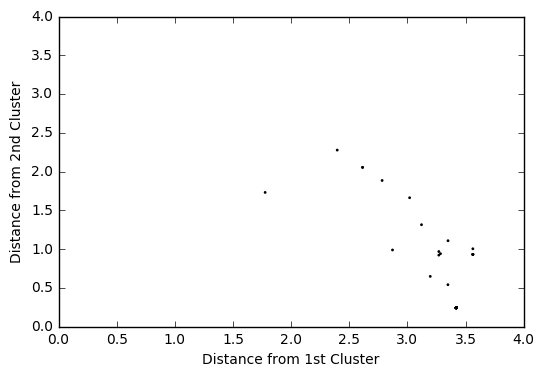

In [19]:
#Plot Clusters
import matplotlib.pyplot as plt

plt.scatter(senator_distances[:,0],senator_distances[:,1], labels)
plt.xlabel('Distance from 1st Cluster')
plt.ylabel('Distance from 2nd Cluster')
plt.show()

In [22]:
#Create custom extremism rating
import numpy
extremism = numpy.sum((senator_distances**3), axis = 1)

votes['extremism']=extremism
votes = votes.sort_values('extremism', ascending = False)

#Print the most partisan senators
print (votes.head(10))

        name party state  00001  00004  00005  00006  00007  00008  00009  \
78     Rubio     R    FL    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
63  Mikulski     D    MD    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
55       Lee     R    UT    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
50      King     I    ME    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
24    Cotton     R    AR    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
67    Murray     D    WA    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
61  Menendez     D    NJ    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
29    Durbin     D    IL    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
79   Sanders     I    VT    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
6      Blunt     R    MO    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
78    1.0    1.0    1.0    0.5    0.5    0.5    0.5    0.5  46.250476  
63    1.